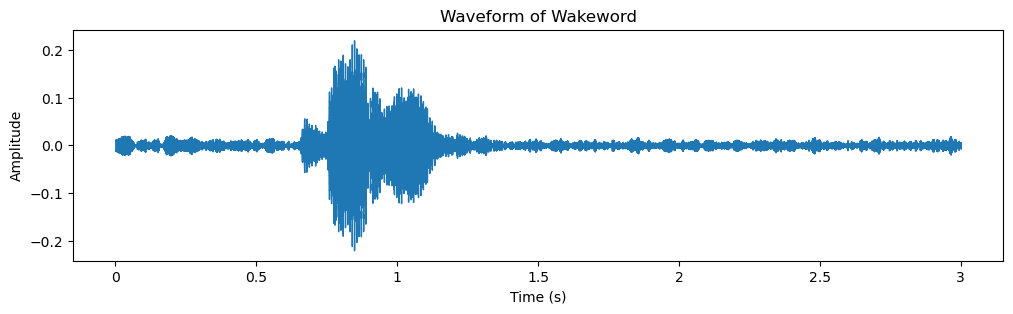

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load a short audio sample
y, sr = librosa.load("/home/xd/Documents/wake-word/.data/wake/wake0.wav", sr=16000)

plt.figure(figsize=(12, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Wakeword")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


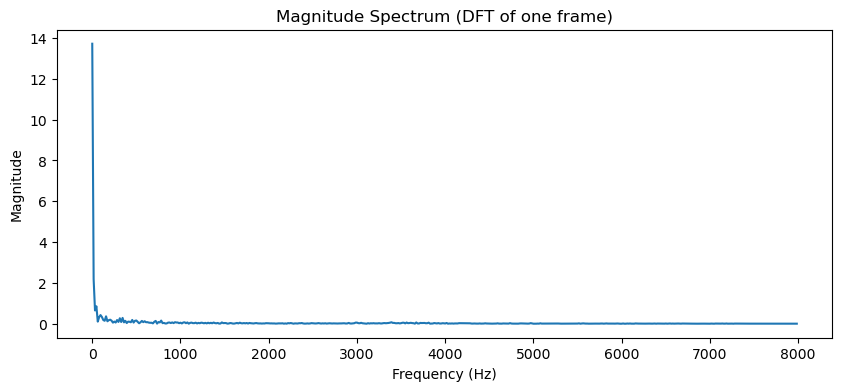

In [2]:
N = 1024
y_slice = y[0:N]
Y = np.fft.fft(y_slice)
freqs = np.fft.fftfreq(N, 1/sr)

plt.figure(figsize=(10,4))
plt.plot(freqs[:N//2], np.abs(Y[:N//2]))
plt.title("Magnitude Spectrum (DFT of one frame)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()


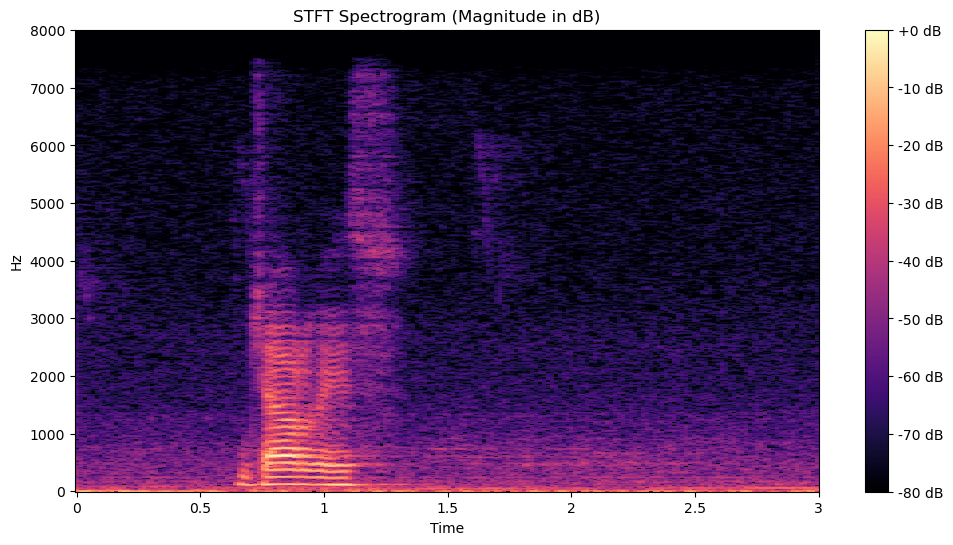

In [3]:
D = librosa.stft(y, n_fft=1024, hop_length=256)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sr, hop_length=256, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.0f dB")
plt.title("STFT Spectrogram (Magnitude in dB)")
plt.show()


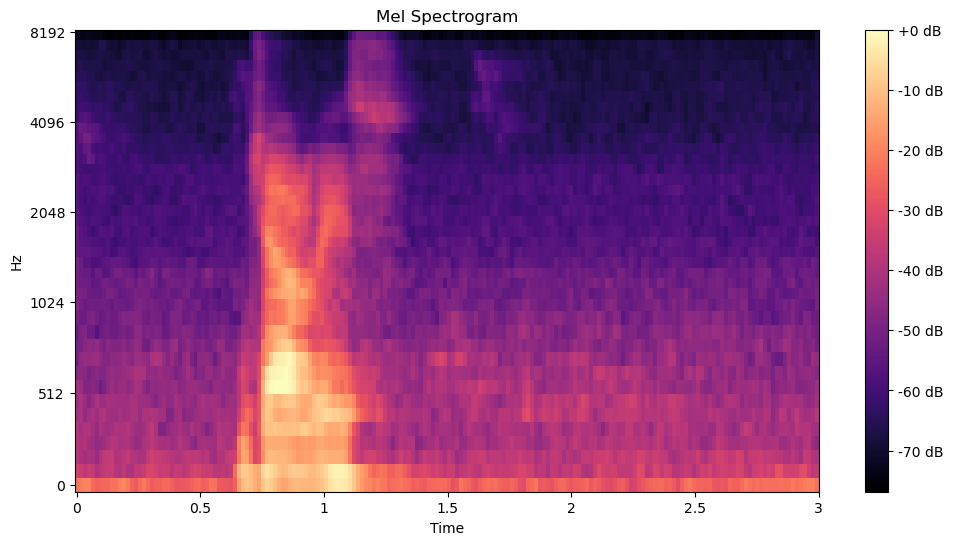

In [4]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=256, n_mels=40)
S_db = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sr, hop_length=256, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()


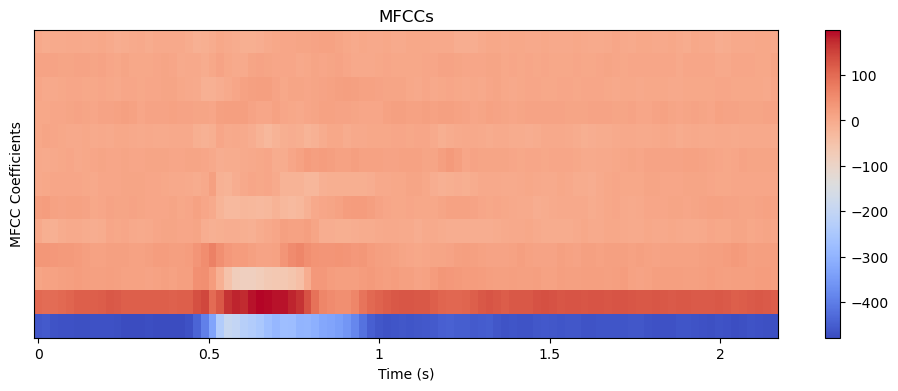

In [5]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title("MFCCs")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.show()
